2 лаба по Практикуму по мат моделированию
Задача 1.2

средние значения переменных X average_X = 130.0
средние значения переменных X average_Y = 35.0
средние квадраты переменных X averageX_2 = 16964.8
средние квадраты переменных Y averageX_2 = 1485.0
выборочные дисперсия s^2_x = 64.79999999999927
выборочные дисперсия s^2_y = 260.0
 ковариация cov = -117.0
коэффициент корреляции ro = -0.9013878188660024
Квантиль нормального распределения u = 2.3263478740408408
-0.982286834212204 <= ro <= -0.5372597472777981
betta1 = 35.0
betta2 = -1.8055555555555756
Уравнение регрессии y = 35.0 + -1.8055555555555756 * (x - 130.0)
Остаточная дисперсия s^2 = 60.9375
Квантиль распределения Стьюдента = 2.896459442760522
27.8499386493158 <= betta1 <= 42.1500613506842
-2.693779067968016 <= betta2 <= -0.9173320431431352
Критическое значения F-распределенияf = 6.636591793889975


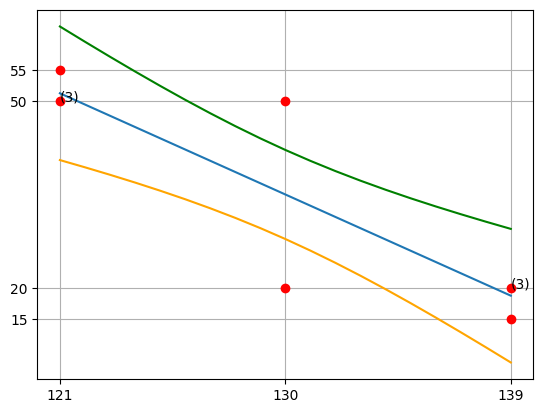

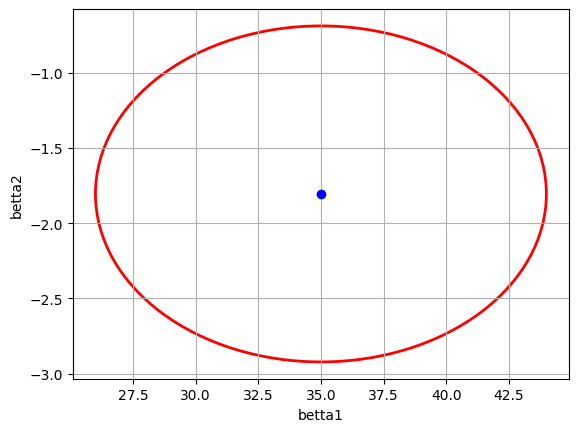

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

alpha = 0.02

def sumForLine(matrix): # складываем элементы по строка этой матрицы.
    line_sums = [0] * len(matrix)
    for l_idx in range(len(matrix)):#итерация по строкам
        for c_idx in range(len(matrix[0])):#по индексам элементов этой строки.
            line_sums[l_idx] += matrix[l_idx][c_idx]#значение элемента из текущей строки складывается с соответствующим элементом в списке sums, который отслеживает суммы для каждого столбца.
    return line_sums

def sumForColumn(matrix):# складываем элементы по столбцам
    sums = [0] * len(matrix[0])
    for line in matrix:#по строкам матрицы.
        for index in range(len(line)): #по элементам текущей строки.
            sums[index] += line[index] #Суммируем элементы текущего столбца и добавляем результат в соответствующий элемент списка sums.
    return sums

def weighted_average(values, weights):# взвешенное_среднее
    total_weight = 0
    weighted_sum = 0
    for index in range(len(values)):# по списоку_значений
        weighted_sum += values[index] * weights[index] #взвешенная_сумма += список_значений[индекс] * список_весов[индекс]
        total_weight += weights[index] #общий_вес += список_весов[индекс]
    return weighted_sum / total_weight #взвешенная_сумма / общий_вес

def weighted_avg_matrix(row_values, column_values, weights):#взвешенное_среднее_матрицы(значения_строки, значения_столбца, веса))
    total_weight = 0
    weighted_sum = 0
    for row in range(len(row_values)): # по значения_строки
        for column in range(len(column_values)):# по значения_столбца
            weighted_sum += row_values[row] * column_values[column] * weights[row][column] #взвешенная_сумма += значения_строки[строка] * значения_столбца[столбец] * веса[строка][столбец]
            total_weight += weights[row][column] #  общий_вес += веса[строка][столбец]
    return weighted_sum / total_weight #взвешенная_сумма / общий_вес

def squares(input_values): #функция вовзведения в квадрат
    squared_values = []
    for value in input_values:
        squared_values.append(value * value)
    return squared_values

X = np.array([121, 130, 139])
Y = np.array([15, 20, 50, 55])
XY = np.array([[0, 0, 1],
               [0, 1, 3],
               [3, 1, 0],
               [1, 0, 0]])
#среднее значение для переменных с использованием взвешенной суммы по столбцам матрицы XY.
average_X = weighted_average(X, sumForColumn(XY)) #взвешенное_среднее(X, сумма_для_столбца(XY))
average_Y = weighted_average(Y, sumForLine(XY)) #взвешенное_среднее(Y, сумма_для_строки(XY))

print(f'средние значения переменных X average_X = {average_X}') #средние значения переменных X
print(f'средние значения переменных X average_Y = {average_Y}') #средние значения переменных X

averageX_2 = weighted_average(squares(X), sumForColumn(XY)) #средние квадраты переменных X
averageY_2 = weighted_average(squares(Y), sumForLine(XY))#средние квадраты переменных Y

print(f'средние квадраты переменных X averageX_2 = {averageX_2}')
print(f'средние квадраты переменных Y averageX_2 = {averageY_2}')

s2_x = averageX_2 - average_X * average_X #выборочные дисперсии
s2_y = averageY_2 - average_Y * average_Y

print(f'выборочные дисперсия s^2_x = {s2_x}')
print(f'выборочные дисперсия s^2_y = {s2_y}')

cov = weighted_avg_matrix(Y, X, XY) - average_X * average_Y # ковариация

print(f' ковариация cov = {cov}')

ro = cov / np.sqrt(s2_x * s2_y) #коэффициент корреляции

print(f"коэффициент корреляции ro = {ro}")

u = stats.norm.ppf(1 - alpha / 2, loc=0, scale=1) # среднее равно 0, а стандартное отклонение равно 1.
print(f'Квантиль нормального распределения u = {u}')

n = np.sum([np.sum(line) for line in XY]) #сумму всех элементов матрицы XY
t1 = (1 + ro) / (1 - ro) * np.exp(-2 * u / np.sqrt(n - 3)) # верхний конец доверительного интервала для коэффициента корреляции
t2 = (1 + ro) / (1 - ro) * np.exp(2 * u / np.sqrt(n - 3)) # нижний конец доверительного интервала для коэффициента корреляции

print(f"{(t1 - 1)/(t1 + 1)} <= ro <= {(t2 - 1)/(t2 + 1)}")

betta1 = average_Y #среднее значение зависимой переменной y- параметры регрессии 
betta2 = ro * np.sqrt(s2_y) / np.sqrt(s2_x) #как зависимая переменная y изменяется при изменении независимой переменной x 
#произведение коэффициента корреляции на корень из дисперсии y, деленный на корень из дисперсии x

print(f"betta1 = {betta1}")
print(f"betta2 = {betta2}")
print(f"Уравнение регрессии y = {betta1} + {betta2} * (x - {average_X})")

s_2 = np.sum([(Y[j] - betta1 - betta2 * (X[i] - average_X))**2 * XY[j][i] for i in range(len(X)) for j in range(len(Y))]) / (n - 2)
#сумма квадратов разностей между фактическими значениями и предсказанными значениями, где разница в каждом наблюдении взвешивается на количество наблюдений в соответствующей ячейке матрицы XY.
print(f"Остаточная дисперсия s^2 = {s_2}")

t = stats.t.ppf(1 - alpha / 2, n - 2)
print(f"Квантиль распределения Стьюдента = {t}")
#нижнюю и верхнюю границу доверительного интервала
print(f"{betta1 - t * np.sqrt(s_2) / np.sqrt(n)} <= betta1 <= {betta1 + t * np.sqrt(s_2) / np.sqrt(n)}")
print(f"{betta2 - t * np.sqrt(s_2) / np.sqrt(n * s2_x)} <= betta2 <= {betta2 + t * np.sqrt(s_2) / np.sqrt(n * s2_x)}")


def y_prognoz(x):#оценку :прогнозирование значений зависимой переменной (Y) на основе рассчитанных коэффициентов модели регрессии.
    return betta1 + betta2 * (x - average_X)

def y_razbros(x):#оценку дисперсии y при заданном значении x
    return np.sqrt(s_2) * t / np.sqrt(n) * np.sqrt(1 + (x - average_X)**2 / s2_x)


plt.plot([min(X), max(X)], [betta1 + betta2 * (min(X) - average_X), betta1 + betta2 * (max(X) - average_X)])#строит линию регрессии- Она вычисляет предсказанные значения Y  для минимального и максимального значений X, затем строит прямую линию, соединяющую эти две точки.
x_minmax = np.arange(min(X), max(X) + 1) #создает массив значений X от минимального значения X до максимального значения X.
y_prognoz_down = y_prognoz(x_minmax) - y_razbros(x_minmax)#вычисляет нижнюю границу доверительного интервала для предсказанных значений Y
y_prognoz_up = y_prognoz(x_minmax) + y_razbros(x_minmax) #вычисляет верхнюю границу доверительного интервала для предсказанных значений Y
plt.plot(x_minmax, y_prognoz_down, color='orange') #строит нижнюю границу доверительного интервала.
plt.plot(x_minmax, y_prognoz_up, color='green') #строит верхнюю границу доверительного интервала.

#строит точки на графике для каждой комбинации значений переменных X и Y, если их вес (количество наблюдений) в матрице XY больше нуля
for i in range(len(X)):#перебирает индексы элементов в списке X
    for j in range(len(Y)):#перебирает индексы элементов в списке Y.
        if XY[j][i] != 0:#  если значение в матрице XY для соответствующей комбинации X[i] и Y[j] не равно нулю
            plt.plot(X[i], Y[j], 'ro')#Строится точка на графике с координатами X[i] по оси X и Y[j] по оси Y, 
            if XY[j][i] > 1:#если вес (количество наблюдений) для данной комбинации больше 1.
                plt.text(X[i], Y[j], f"({int(XY[j][i])})")#Над точкой выводится число, обозначающее количество наблюдений в этой ячейке матрицы

#устанавливает метки по оси X и оси Y в соответствии с значениями массивов X и Y 
plt.xticks(X)
plt.yticks(Y)
plt.grid()

plt.figure()

f = stats.f.ppf(1 - alpha, 2, n - 2)
print(f"Критическое значения F-распределенияf = {f}")
#вычисляет высоту h и ширину w эллипса доверительных интервалов
h = 2 * np.sqrt(2 * s_2 * f / (n * s2_x)) 
w = 2 * np.sqrt(2 * s_2 * f / n) 

plt.plot(betta1, betta2, 'bo')# код строит точку (betta1, betta2) на графике
plt.grid()

ax = plt.gca()
#cоздает объект Ellipse (эллипс) с центром в точке (betta1, betta2), шириной w и высотой h, с красной границей и без заливки (fc='None'). 
ellipse = Ellipse(xy=(betta1, betta2), width=w, height=h, edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

plt.xlabel("betta1")
plt.ylabel("betta2")
plt.show()

In [1]:
pip install --upgrade numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
